# Titanic - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(['PassengerId','Name', 'Ticket', 'Fare'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [4]:
# To check the null values

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


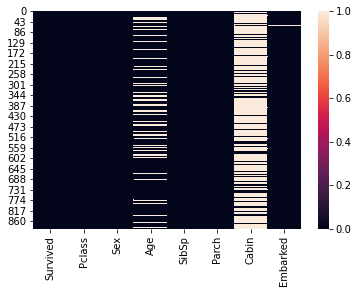

In [6]:
sns.heatmap(df.isnull())

In [7]:
# So many null values present in Cabin column. So droping Cabin column

df = df.drop('Cabin', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


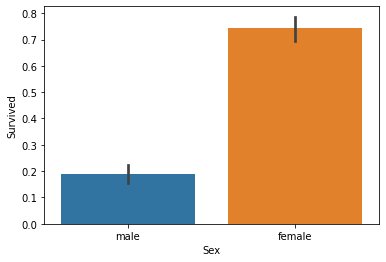

In [8]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

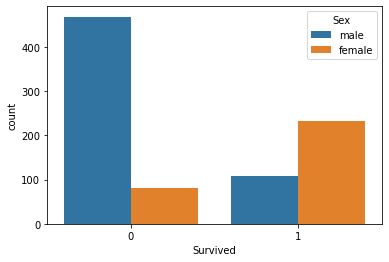

In [9]:
sns.countplot(x='Survived', hue='Sex', data=df)

In [10]:
# Filling the null values of column Age with mean

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
df['Age'] = imp.fit_transform(df['Age'].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


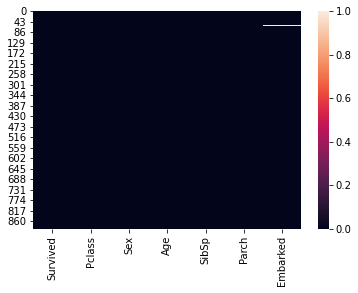

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [13]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000


In [14]:
pd.get_dummies(df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [15]:
Sex = pd.get_dummies(df["Sex"],drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [16]:
embarked = pd.get_dummies(df["Embarked"],drop_first=True)

In [17]:
df = pd.concat([df,Sex,embarked],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,Q,S
0,0,3,male,22.000000,1,0,S,1,0,1
1,1,1,female,38.000000,1,0,C,0,0,0
2,1,3,female,26.000000,0,0,S,0,0,1
3,1,1,female,35.000000,1,0,S,0,0,1
4,0,3,male,35.000000,0,0,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,1,0,1
887,1,1,female,19.000000,0,0,S,0,0,1
888,0,3,female,29.699118,1,2,S,0,0,1
889,1,1,male,26.000000,0,0,C,1,0,0


In [18]:
df.drop(["Sex","Embarked"],axis=1,inplace=True)

In [19]:
# To check the Skewness
df.skew()
# Sibsp & Parch is having more than 0.5

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
male       -0.618921
Q           2.948778
S          -0.997083
dtype: float64

In [20]:
# Using log to bring the skewed values to normal form

df['SibSp'] = np.log1p(df['SibSp'])
df['Parch'] = np.log1p(df['Parch'])

In [21]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       1.661245
Parch       1.675439
male       -0.618921
Q           2.948778
S          -0.997083
dtype: float64

In [22]:
# Check the outliers

from scipy.stats import zscore

z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score <3).all(axis=1)]
print(df_final.shape)

(891, 8)
(787, 8)


In [23]:
# Separate the data & Target

x = df_final.drop("Survived",axis=1)
y = df_final["Survived"]

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xt = sc.fit_transform(x)
xt

array([[ 0.89948918, -0.58269246,  1.04555578, ...,  0.71859422,
         0.        ,  0.52096592],
       [-1.46806261,  0.67513925,  1.04555578, ..., -1.39160597,
         0.        , -1.91951135],
       [ 0.89948918, -0.26823453, -0.62395983, ..., -1.39160597,
         0.        ,  0.52096592],
       ...,
       [-1.46806261, -0.8185359 , -0.62395983, ..., -1.39160597,
         0.        ,  0.52096592],
       [ 0.89948918,  0.02256968,  1.04555578, ..., -1.39160597,
         0.        ,  0.52096592],
       [-1.46806261, -0.26823453, -0.62395983, ...,  0.71859422,
         0.        , -1.91951135]])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

max_acc_scr = 0
for r_st in range(70, 103):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size = 0.3, random_state = r_st)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    acc_scr = accuracy_score(y_test, y_pred)
    
    if max_acc_scr < acc_scr:
        max_acc_scr = acc_scr
        final_r_st = r_st
print('Max accuracy_score %s according to random state : %s' %(max_acc_scr, r_st))

Max accuracy_score 0.8270042194092827 according to random state : 102


In [26]:
from sklearn.model_selection import cross_val_score

print('Mean: %s' % cross_val_score(LogisticRegression(), xt, y, cv=10, scoring='accuracy').mean())

Mean: 0.7841123012009087


In [27]:
x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size = 0.3, random_state = 102)
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
acc_scr = accuracy_score(y_test, y_pred)

In [28]:
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report : \n', classification_report(y_test, y_pred))

Confusion Matrix : 
 [[123  25]
 [ 24  65]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       148
           1       0.72      0.73      0.73        89

    accuracy                           0.79       237
   macro avg       0.78      0.78      0.78       237
weighted avg       0.79      0.79      0.79       237



In [29]:
import joblib

joblib.dump(lg, 'lr_titanic.pkl')

['lr_titanic.pkl']